## Remove HETATMs from all PDB files create residue name list

In [9]:
import numpy as np
from Bio.PDB import *
import os
import matplotlib.pyplot as plt
import random
from itertools import chain
import seaborn as sns
parser = PDBParser()
# Remove the HETATMs (non-standard proteins)
os.makedirs('cleanAbAgData')
for filename in os.listdir("AbAgData"):
    allProteins = open("AbAgData/"+filename, 'r')
    onlyATMs = open('cleanAbAgData/'+filename, 'w')
    # Only keep lines without HETATM at the start
    for line in allProteins:
        if (line[0:6] != "HETATM"):
            onlyATMs.write(line)
    allProteins.close()
    onlyATMs.close()
amino3CodesStr = 'alaargasnaspcysgluglnglyhisileleulysmetpheproserthrtrptyrval'
amino3Codes = [amino3CodesStr[x:x+3].upper() for x in range(0, len(amino3CodesStr), 3)]
amino3Codes = list(sorted(amino3Codes))
print(amino3Codes)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'cleanAbAgData'

### Record all intra-antigen interactions
For each antigen, track every residue that interacts with the antibody (H/L chains) and add residue object to list 

Remove all non-amino acids in the list 

In [19]:
os.makedirs('AgFreqChart')
for filename in os.listdir("cleanAbAgData"):
    InteractingAgList = []
    data = parser.get_structure(filename[:-4], "cleanAbAgData/"+filename)
    chains = list(list(data.get_models())[0].get_chains())
    # Get antibody chains into list
    chainL, chainH = [], []
    for x in chains: 
        if x.id == "L":
            chainL = list(x.get_residues())
        if x.id == "H":
            chainH = list(x.get_residues())
    chainsLH = chainL + chainH

    # Create atom list of Ab residues for searching later 
    AbAtomList = [list(x.get_atoms()) for x in chainsLH if x.get_resname() in amino3Codes]
    AbAtomList = list(chain.from_iterable(AbAtomList))
    NBSearch = NeighborSearch(AbAtomList)

    ### Gather Ag residues interacting with Ab 
    for x in chains:
        currRes = list(x.get_residues())
        if x.id != "L" and x.id != "H":
            for res in currRes:
                for atm in list(res.get_atoms()):
                    centerPos = atm.coord
                    if len(NBSearch.search(centerPos, 5, 'R')) > 0:
                        InteractingAgList.append(res)
                        break # break after a single atom from the residue interacts with Ab 

    ### Get rid of non-amino acids 
    InteractingAgList = [residue for residue in InteractingAgList if residue.get_resname() in amino3Codes]

    # Initialize empty intra-antigen interaction list
    AgInteractionList = {}
    for i in range(len(amino3Codes)):
        for j in range(i, len(amino3Codes)):
            combinationName = amino3Codes[i] + " " + amino3Codes[j]
            AgInteractionList[combinationName] = 0

    ### Count intra-Ag interactions -> dict
    atms = [r.get_atoms() for r in InteractingAgList]
    if (len(atms) > 0):
        NBSearch2 = NeighborSearch(list(chain.from_iterable(atms))) # Count interactions using neighbor search
        AgInteractions = NBSearch2.search_all(5, level='R')
        for (r1, r2) in AgInteractions:
            combinationName = min([r1.get_resname(), r2.get_resname()]) + " " + max([r1.get_resname(), r2.get_resname()])
            AgInteractionList[combinationName] += 1

        ### Save dict as normalized chart numpy 2d array
        # Create frequency chart/triangle using the alphabetized amino codes
        freqChart = np.empty((20, 20))
        freqChart.fill(np.nan)
        for r in range(len(amino3Codes)):
            for c in range(r, len(amino3Codes)):
                fst, snd = amino3Codes[r], amino3Codes[c]
                combinationName = fst + " " + snd
                count = AgInteractionList[combinationName]
                freqChart[r, c] = count

        # Normalize
        freqChart -= np.nanmin(freqChart)
        freqChart /= (np.nanmax(freqChart) - np.nanmin(freqChart))
        # Save chart to file
        with open("AgFreqChart/FreqChart"+filename[:-4]+".npy", "wb") as f:
            np.save(f, freqChart)
    else:
        print(filename)

c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5079
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5080
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5081
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5082
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5083
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5084
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 

6JMQ_1.pdb


c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3991
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3992
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3993
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3994
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3995
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3996
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 

### Displaying Antigen Freq Chart

c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5079
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5080
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5081
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5082
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5083
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5084
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 

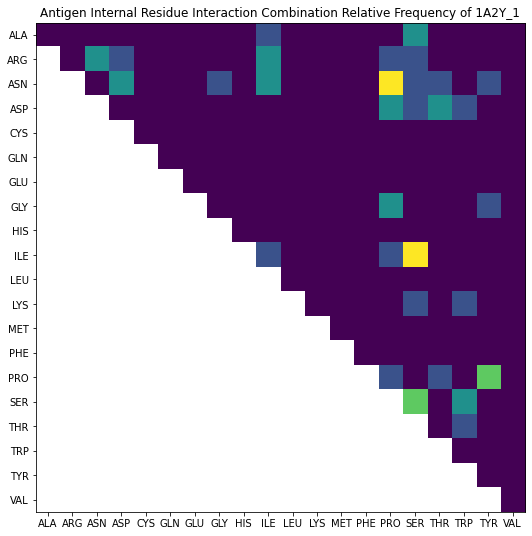

In [23]:
n = 0
for filename in os.listdir("cleanAbAgData"):
    n+=1
    if (n == 2):
        break
    InteractingAgList = []
    data = parser.get_structure(filename[:-4], "cleanAbAgData/"+filename)
    chains = list(list(data.get_models())[0].get_chains())
    chainL, chainH = [], []
    for x in chains:
        if x.id == "L":
            chainL = list(x.get_residues())
        if x.id == "H":
            chainH = list(x.get_residues())
    chainsLH = chainL + chainH

    # Create atom list of Ab residues for searching later 
    AbAtomList = [list(x.get_atoms()) for x in chainsLH if x.get_resname() in amino3Codes]
    AbAtomList = list(chain.from_iterable(AbAtomList))
    NBSearch = NeighborSearch(AbAtomList)

    ### Gather Ag residues interacting with Ab 
    for x in chains:
        currRes = list(x.get_residues())
        if x.id != "L" and x.id != "H":
            for res in currRes:
                for atm in list(res.get_atoms()):
                    centerPos = atm.coord
                    if len(NBSearch.search(centerPos, 5, 'R')) > 0:
                        InteractingAgList.append(res)
                        break # break after a single atom from the residue interacts with Ab 

    # Initialize empty intra-antigen interaction list
    AgInteractionList = {}
    for i in range(len(amino3Codes)):
        for j in range(i, len(amino3Codes)):
            combinationName = amino3Codes[i] + " " + amino3Codes[j]
            AgInteractionList[combinationName] = 0

    ### Count intra-Ag interactions -> dict
    atms = [r.get_atoms() for r in InteractingAgList if r.get_resname() in amino3Codes]
    NBSearch2 = NeighborSearch(list(chain.from_iterable(atms))) # Count interactions using neighbor search
    AgInteractions = NBSearch2.search_all(5, level='R')
    for (r1, r2) in AgInteractions:
        combinationName = min([r1.get_resname(), r2.get_resname()]) + " " + max([r1.get_resname(), r2.get_resname()])
        AgInteractionList[combinationName] += 1

    ### Save dict as normalized chart numpy 2d array
    # Create frequency chart/triangle using the alphabetized amino codes
    freqChart = np.empty((20, 20))
    freqChart.fill(np.nan)
    for r in range(len(amino3Codes)):
        for c in range(r, len(amino3Codes)):
            fst, snd = amino3Codes[r], amino3Codes[c]
            combinationName = fst + " " + snd
            count = AgInteractionList[combinationName]
            freqChart[r, c] = count
    # Normalize
    freqChart -= np.nanmin(freqChart)
    freqChart /= (np.nanmax(freqChart) - np.nanmin(freqChart))
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111)
    ax.set_xticks(np.arange(0, 20, 1))
    ax.set_yticks(np.arange(0, 20, 1))
    ax.set_xticklabels(amino3Codes)
    ax.set_yticklabels(amino3Codes)
    ax.imshow(freqChart)
    plt.title("Antigen Internal Residue Interaction Combination Relative Frequency of 1A2Y_1")

### Record all intra-Ab interactions
Select CDR ranges and add to list 

Search for and record unique interactions 

In [12]:
ranges = [[27, 36], [48, 60], [91, 104]]
os.makedirs('AbFreqChart')
for filename in os.listdir("cleanAbAgData"):
    AbCDR = []
    data = parser.get_structure(filename[:-4], "cleanAbAgData/"+filename)
    chains = list(list(data.get_models())[0].get_chains())
    chainL, chainH = [], []
    for x in chains: 
        if x.id == "L":
            chainL = list(x.get_residues())
        if x.id == "H":
            chainH = list(x.get_residues())
    # Now the AbCDR region is contained inside the variable as a list of residues
    # Initialize empty intra-antibody interaction list
    AbInteractionList = {}
    for i in range(len(amino3Codes)):
        for j in range(i, len(amino3Codes)):
            combinationName = amino3Codes[i] + " " + amino3Codes[j]
            AbInteractionList[combinationName] = 0
    # Load region
    chainsLH = [chainL, chainH]
    for chainX in chainsLH:
        for r in ranges:
            fst, snd = r[0], r[1]
            AbCDR += chainX[fst-1: snd]
    # Count interactions
    atms = [r.get_atoms() for r in AbCDR if r.get_resname() in amino3Codes]
    if (len(atms) > 0):
        NBSearch = NeighborSearch(list(chain.from_iterable(atms)))
        AbInteractions = NBSearch.search_all(5, level='R')
        for (r1, r2) in AbInteractions:
            combinationName = min([r1.get_resname(), r2.get_resname()]) + " " + max([r1.get_resname(), r2.get_resname()])
            AbInteractionList[combinationName] += 1
        # Create frequency chart/triangle using the alphabetized amino codes
        freqChart = np.empty((20, 20))
        freqChart.fill(np.nan)
        for r in range(len(amino3Codes)):
            for c in range(r, len(amino3Codes)):
                fst, snd = amino3Codes[r], amino3Codes[c]
                combinationName = fst + " " + snd
                count = AbInteractionList[combinationName]
                freqChart[r, c] = count
        # Normalize
        freqChart -= np.nanmin(freqChart)
        freqChart /= (np.nanmax(freqChart) - np.nanmin(freqChart))
        # Save chart to file
        with open("AbFreqChart/FreqChart"+filename[:-4]+".npy", "wb") as f:
            np.save(f, freqChart)
# remove the file because no antigen side interaction
os.remove('AbFreqChart/FreqChart6JMQ_1.npy')

c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5079
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5080
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5081
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5082
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5083
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5084
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 

### Displaying Antibody Freq Chart

c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5079
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5080
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5081
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5082
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5083
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 5084
  warnings.warn(
c:\Python310\lib\site-packages\Bio\PDB\PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 

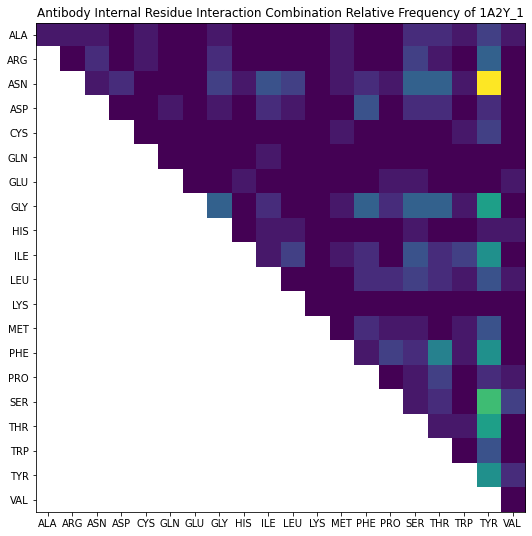

In [22]:
ranges = [[27, 36], [48, 60], [91, 104]]
n = 0
for filename in os.listdir("cleanAbAgData"):
    n+=1
    if (n > 1):
        break
    AbCDR = []
    data = parser.get_structure(filename[:-4], "cleanAbAgData/"+filename)
    chains = list(list(data.get_models())[0].get_chains())
    chainL, chainH = [], []
    for x in chains: 
        if x.id == "L":
            chainL = list(x.get_residues())
        if x.id == "H":
            chainH = list(x.get_residues())

    # Initialize empty intra-antibody interaction list
    AbInteractionList = {}
    for i in range(len(amino3Codes)):
        for j in range(i, len(amino3Codes)):
            combinationName = amino3Codes[i] + " " + amino3Codes[j]
            AbInteractionList[combinationName] = 0
    
    chainsLH = [chainL, chainH]
    for chainX in chainsLH:
        for r in ranges:
            fst, snd = r[0], r[1]
            AbCDR += chainX[fst-1: snd]

    # Count interactions using neighbor search
    atms = [r.get_atoms() for r in AbCDR if r.get_resname() in amino3Codes]
    NBSearch = NeighborSearch(list(chain.from_iterable(atms)))
    AbInteractions = NBSearch.search_all(5, level='R')
    for (r1, r2) in AbInteractions:
        combinationName = min([r1.get_resname(), r2.get_resname()]) + " " + max([r1.get_resname(), r2.get_resname()])
        AbInteractionList[combinationName] += 1

    # Create frequency chart/triangle using the alphabetized amino codes
    freqChart = np.empty((20, 20))
    freqChart.fill(np.nan)
    for r in range(len(amino3Codes)):
        for c in range(r, len(amino3Codes)):
            fst, snd = amino3Codes[r], amino3Codes[c]
            combinationName = fst + " " + snd
            count = AbInteractionList[combinationName]
            freqChart[r, c] = count
    # Normalize
    freqChart -= np.nanmin(freqChart)
    freqChart /= (np.nanmax(freqChart) - np.nanmin(freqChart))
    # plot
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111)
    ax.set_xticks(np.arange(0, 20, 1))
    ax.set_yticks(np.arange(0, 20, 1))
    ax.set_xticklabels(amino3Codes)
    ax.set_yticklabels(amino3Codes)
    ax.imshow(freqChart)
    plt.title("Antibody Internal Residue Interaction Combination Relative Frequency of 1A2Y_1")

## Matching datasets

In [20]:
AbFreqCharts, AgFreqCharts = [], []
matchFreqCharts = []
os.makedirs('matchData')
for filename in os.listdir("AbFreqChart"):
    AbFreqCharts.append(np.load("AbFreqChart/"+filename))
for filename in os.listdir("AgFreqChart"):
    AgFreqCharts.append(np.load("AgFreqChart/"+filename))
for i, (Ab, Ag) in enumerate(zip(AbFreqCharts, AgFreqCharts)):
    flippedAb = np.flipud(Ab)
    matchFreqChart = np.concatenate([flippedAb, Ag], axis=1)
    matchFreqChart = np.array([r[~np.isnan(r)] for r in matchFreqChart])
    with open("matchData/"+os.listdir("AbFreqChart")[i], "wb") as f:
        np.save(f, matchFreqChart)

### Plotting Combined Interaction

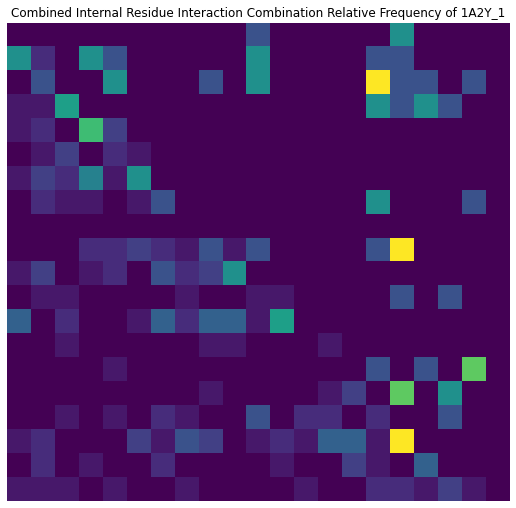

In [21]:
AbFreqCharts, AgFreqCharts = [], []
matchFreqCharts = []
for filename in os.listdir("AbFreqChart"):
    AbFreqCharts.append(np.load("AbFreqChart/"+filename))
for filename in os.listdir("AgFreqChart"):
    AgFreqCharts.append(np.load("AgFreqChart/"+filename))
for i, (Ab, Ag) in enumerate(zip(AbFreqCharts, AgFreqCharts)):
    if i > 0:
        break
    flippedAb = np.flipud(Ab)
    matchFreqChart = np.concatenate([flippedAb, Ag], axis=1)
    matchFreqChart = np.array([r[~np.isnan(r)] for r in matchFreqChart])
    fig = plt.figure(figsize=(9, 9))
    ax = fig.add_subplot(111)
    ax.axis("off")
    ax.imshow(matchFreqChart)
    plt.title("Combined Internal Residue Interaction Combination Relative Frequency of 1A2Y_1")

In [22]:
print( len(os.listdir('AbFreqChart')), len(os.listdir('AgFreqChart')) )
# 6jqm_1 was removed since it had no antigen interaction

1215 1215


## Non-matching dataset

In [23]:
AbFreqCharts, AgFreqCharts = [], []
os.makedirs("nonmatchData")
for filename in os.listdir("AbFreqChart"):
    AbFreqCharts.append(np.load("AbFreqChart/"+filename))
for filename in os.listdir("AgFreqChart"):
    AgFreqCharts.append(np.load("AgFreqChart/"+filename))

prevNonmatchIndPairs = []
for i in range(1215):
    correct = False
    while not correct:
        AbInd, AgInd = np.random.randint(0, 1215), np.random.randint(0, 1215)
        if AbInd != AgInd and (AbInd, AgInd) not in prevNonmatchIndPairs: # make sure no repeats
            prevNonmatchIndPairs.append((AbInd, AgInd))
            correct = True
            # Combine array
            Ab = np.flipud(AbFreqCharts[AbInd])
            Ag = AgFreqCharts[AgInd]
            nonmatchFreqChart = np.concatenate([Ab, Ag], axis=1)
            nonmatchFreqChart = np.array([r[~np.isnan(r)] for r in nonmatchFreqChart])
            with open("nonmatchData/"+os.listdir("AbFreqChart")[AbInd][:-4] + "__" + os.listdir('AgFreqChart')[AgInd], "wb") as f: # Ab comes first
                np.save(f, nonmatchFreqChart)

## Machine Learning

### Load Data into Keras Tensor Format

In [24]:
matchingArr, mismatchArr = [], []
for filename in os.listdir("matchData"):
    matchingArr.append(np.load("matchData/"+filename))
for filename in os.listdir("nonmatchData"):
    mismatchArr.append(np.load("nonmatchData/"+filename))

#### Create dataset with mismatched values

In [25]:
data, labels = [], []
for arr in matchingArr:
    data.append(arr)
    labels.append(1)
for arr in mismatchArr:
    data.append(arr)
    labels.append(0)
data = np.array(data)
labels = np.array(labels).reshape(-1, 1)

#### Display Example (Index 1214/1215 is the boundary)

(20, 21)


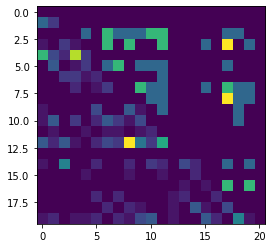

In [29]:
plt.imshow(data[1214])
print(data[0].shape)

### Model Creation

In [35]:
def plot_roc_curve(fpr,tpr, title):
    fig = plt.figure(figsize=(15, 15)) 
    plt.plot(fpr,tpr) 
    plt.axis([0,1,0,1]) 
    plt.title(title)
    plt.xlabel('False Positive Rate') 
    plt.ylabel('True Positive Rate') 
    plt.show()    

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Input, Dropout
from keras import applications
def create_model_mismatch():
    # base_model=applications.VGG16(include_top=False, weights='imagenet',input_tensor=Input(shape=(20, 21, 1)))
    # for layer in base_model.layers:
    #     layer.trainable = False
    model = Sequential()
    model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(20,21,1)))
    model.add(MaxPooling2D((2, 2), padding='same'))
    #model.add(Dropout(0.25))

    model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    #model.add(Dropout(0.25))

    model.add(Conv2D(32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), padding='same'))

    model.add(Flatten())

    model.add(Dense(512, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

Epoch 1/1000
157/157 [==============================] - 2s 6ms/step - loss: 0.6933 - accuracy: 0.4934 - precision_21: 0.4959 - recall_21: 0.8371 - val_loss: 0.6935 - val_accuracy: 0.4938 - val_precision_21: 0.4977 - val_recall_21: 0.9016
Epoch 2/1000
157/157 [==============================] - 1s 5ms/step - loss: 0.6931 - accuracy: 0.5039 - precision_21: 0.5020 - recall_21: 0.9296 - val_loss: 0.6936 - val_accuracy: 0.5103 - val_precision_21: 0.5064 - val_recall_21: 0.9672
Epoch 3/1000
157/157 [==============================] - 1s 5ms/step - loss: 0.6930 - accuracy: 0.5057 - precision_21: 0.5030 - recall_21: 0.9122 - val_loss: 0.6936 - val_accuracy: 0.4650 - val_precision_21: 0.4798 - val_recall_21: 0.7787
Epoch 4/1000
157/157 [==============================] - 1s 4ms/step - loss: 0.6928 - accuracy: 0.5345 - precision_21: 0.5232 - recall_21: 0.7722 - val_loss: 0.6937 - val_accuracy: 0.4568 - val_precision_21: 0.4740 - val_recall_21: 0.7459
Epoch 5/1000
157/157 [==========================

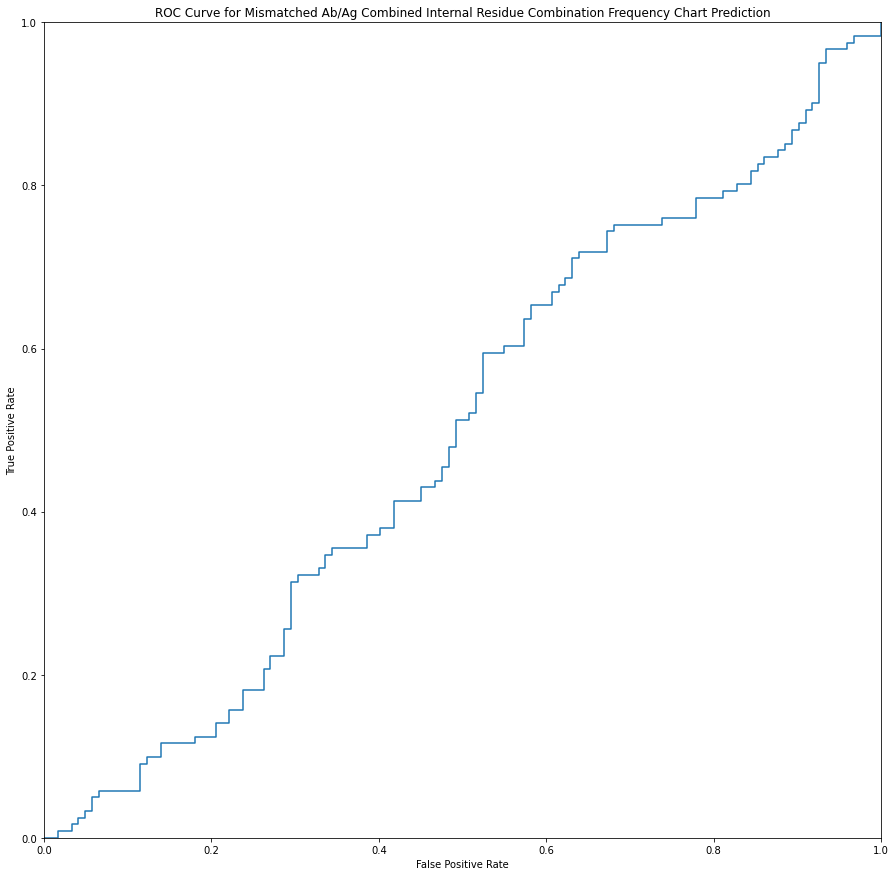

0.49383552364178296
[0.53744856 0.69309179 0.50695366 0.5386768  0.68075464 0.57946906]


In [39]:
from sklearn.model_selection import StratifiedKFold
from keras.losses import BinaryCrossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
from sklearn.metrics import roc_curve, roc_auc_score

kfold = StratifiedKFold(10, shuffle=True, random_state=9001)
accs, aucs, losses, precs, recs, f1s = [np.zeros(10) for _ in range(6)]

for i, (trainInds, testInds) in enumerate(kfold.split(data, labels)):
    model = create_model_mismatch()
    X_train, X_test, y_train, y_test = data[trainInds], data[testInds], labels[trainInds], labels[testInds]
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy', Precision(), Recall()])
    
    # best_weights_file="weights.best.hdf5"
    # checkpoint = ModelCheckpoint(best_weights_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    es = EarlyStopping('val_accuracy', patience=15, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=1000, batch_size=14,
                        validation_data=(X_test, y_test), callbacks=(es))
    test_loss, test_acc, test_prec, test_rec = model.evaluate(X_test, y_test, verbose=1)
    accs[i] = test_acc
    losses[i] = test_loss
    precs[i] = test_prec
    recs[i] = test_rec
    test_f1 = 2 * (test_prec * test_rec) / (test_prec + test_rec)
    f1s[i] = test_f1
    prediction = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    auc_score=roc_auc_score(y_test, prediction)
    aucs[i] = auc_score
    if i == 9:
        plot_roc_curve(fpr, tpr, "ROC Curve for Mismatched Ab/Ag Combined Internal Residue Combination Frequency Chart Prediction")
        print(auc_score)
print(np.mean(np.array([accs, losses, aucs, precs, recs, f1s]), axis=1))

## Redo with random values

In [40]:
data, labels = [], []
for arr in matchingArr:
    data.append(arr)
    labels.append(1)
for arr in mismatchArr:
    data.append(np.random.rand(20, 21))
    labels.append(0)
data = np.array(data)
labels = np.array(labels).reshape(-1, 1)

Epoch 1/1000
157/157 [==============================] - 2s 7ms/step - loss: 0.6527 - accuracy: 0.5002 - precision_31: 0.0000e+00 - recall_31: 0.0000e+00 - val_loss: 0.6132 - val_accuracy: 0.4979 - val_precision_31: 0.0000e+00 - val_recall_31: 0.0000e+00
Epoch 2/1000
157/157 [==============================] - 1s 5ms/step - loss: 0.5689 - accuracy: 0.5062 - precision_31: 1.0000 - recall_31: 0.0119 - val_loss: 0.5128 - val_accuracy: 0.5556 - val_precision_31: 1.0000 - val_recall_31: 0.1148
Epoch 3/1000
157/157 [==============================] - 1s 5ms/step - loss: 0.4373 - accuracy: 0.8820 - precision_31: 1.0000 - recall_31: 0.7640 - val_loss: 0.3518 - val_accuracy: 0.9959 - val_precision_31: 1.0000 - val_recall_31: 0.9918
Epoch 4/1000
157/157 [==============================] - 1s 5ms/step - loss: 0.2618 - accuracy: 0.9995 - precision_31: 1.0000 - recall_31: 0.9991 - val_loss: 0.1765 - val_accuracy: 1.0000 - val_precision_31: 1.0000 - val_recall_31: 1.0000
Epoch 5/1000
157/157 [==========

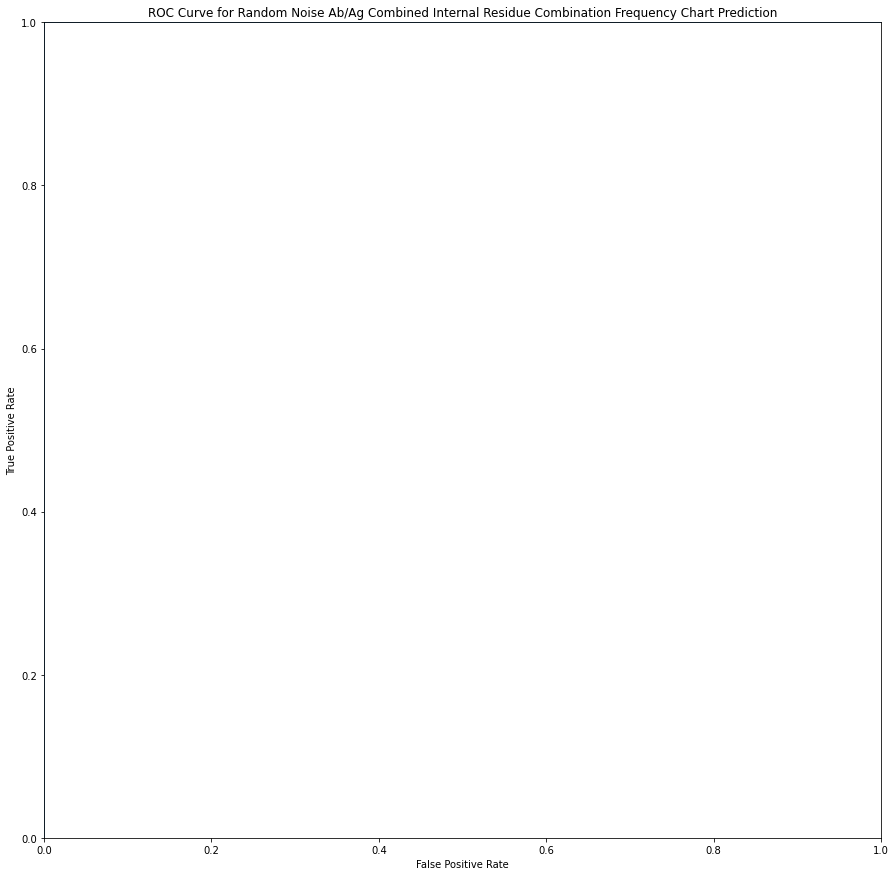

1.0
[1.         0.32988923 1.         1.         1.         1.        ]


In [41]:
from sklearn.model_selection import StratifiedKFold
from keras.losses import BinaryCrossentropy
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam
from keras.metrics import Precision, Recall
from sklearn.metrics import roc_curve, roc_auc_score

kfold = StratifiedKFold(10, shuffle=True, random_state=9001)
accs, aucs, losses, precs, recs, f1s = [np.zeros(10) for _ in range(6)]

for i, (trainInds, testInds) in enumerate(kfold.split(data, labels)):
    model = create_model_mismatch()
    X_train, X_test, y_train, y_test = data[trainInds], data[testInds], labels[trainInds], labels[testInds]
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)

    model.compile(optimizer=Adam(learning_rate=1e-5),
                  loss=BinaryCrossentropy(),
                  metrics=['accuracy', Precision(), Recall()])
    
    # best_weights_file="weights.best.hdf5"
    # checkpoint = ModelCheckpoint(best_weights_file, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    es = EarlyStopping('val_accuracy', patience=15, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=1000, batch_size=14,
                        validation_data=(X_test, y_test), callbacks=(es))
    test_loss, test_acc, test_prec, test_rec = model.evaluate(X_test, y_test, verbose=1)
    accs[i] = test_acc
    losses[i] = test_loss
    precs[i] = test_prec
    recs[i] = test_rec
    test_f1 = 2 * (test_prec * test_rec) / (test_prec + test_rec)
    f1s[i] = test_f1
    prediction = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, prediction)
    auc_score=roc_auc_score(y_test, prediction)
    aucs[i] = auc_score
    if i == 9:
        plot_roc_curve(fpr, tpr, "ROC Curve for Random Noise Ab/Ag Combined Internal Residue Combination Frequency Chart Prediction")
        print(auc_score)
print(np.mean(np.array([accs, losses, aucs, precs, recs, f1s]), axis=1))